<a href="https://www.kaggle.com/code/katherill/cow-faces?scriptVersionId=229358590" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image, ExifTags
import random


In [6]:
def correct_rotation(image):
    try:
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation]=='Orientation':
                break
        exif=dict(image._getexif().items())

        if   exif[orientation] == 3 :
            image=image.rotate(180, expand=True)
        elif exif[orientation] == 6 :
            image=image.rotate(-90, expand=True)
        elif exif[orientation] == 8 :
            image=image.rotate(90, expand=True)

    except (AttributeError, KeyError, IndexError):
        # No EXIF data or orientation tag
        pass
    return image  


In [7]:
def display_kaggle_images(directory, num_images=10, random_seed=42):
    try:
        image_files = [f for f in os.listdir(directory) if f.lower().endswith(".jpg")]
    except FileNotFoundError:
        print(f"Ошибка: Директория '{directory}' не найдена.")
        return

    if not image_files:
        print(f"В директории '{directory}' не найдено JPG-изображений.")
        return

    import random
    random.seed(random_seed)
    selected_images = random.sample(image_files, min(num_images, len(image_files)))

    num_cols = min(5, len(selected_images))
    num_rows = (len(selected_images) + num_cols - 1) // num_cols

    plt.figure(figsize=(12, 6 * num_rows))

    for i, image_file in enumerate(selected_images):
        try:
            image_path = os.path.join(directory, image_file)
            img = Image.open(image_path)
            img = correct_rotation(img)
            img_np = np.array(img)

            plt.subplot(num_rows, num_cols, i + 1)
            plt.imshow(img_np)
            plt.title(image_file, fontsize=8)
            plt.axis('off')

        except FileNotFoundError:
            print(f"Ошибка: Файл '{image_file}' не найден.")
        except IOError:
            print(f"Ошибка: Невозможно открыть или прочитать файл '{image_file}'.")
        except Exception as e:
            print(f"Произошла неожиданная ошибка при обработке файла '{image_file}': {e}")

    plt.tight_layout()
    plt.show()

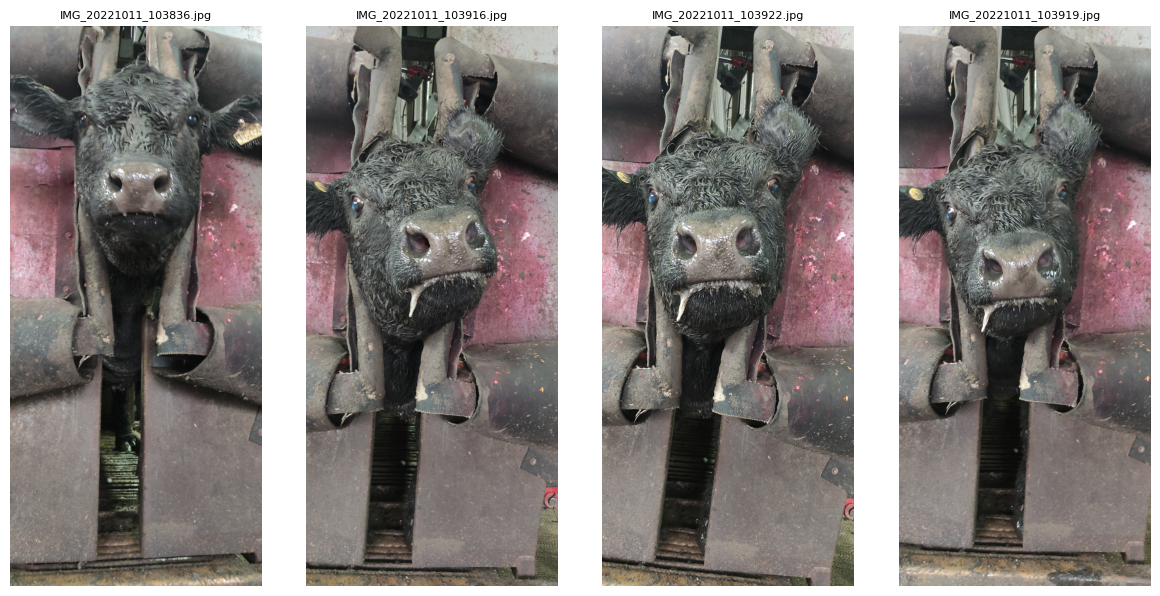

In [8]:
directory_path = "/kaggle/input/cow-face/cattle_face-main/2"
display_kaggle_images(directory_path, num_images=10)